In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor 
from sklearn.svm import LinearSVR


In [2]:
data=pd.read_csv('./possum.csv')
data

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
data.shape

(104, 14)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [6]:
data.isnull().mean()*100

case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64

### Filling the null values

In [7]:
data.age.fillna(data.age.mean(), inplace=True)
data.footlgth.fillna(data.footlgth.mean(), inplace=True)
data.isnull().sum()*100

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [8]:
data['sex']=data['sex'].astype("string")
data['Pop']=data['Pop'].astype("string")
data


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    string 
 3   sex       104 non-null    string 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), string(2)
memory usage: 11.5 KB


In [10]:
data.drop(columns="case", inplace=True)
data

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [11]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()

In [12]:
data["sex"]=L.fit_transform(data.sex)
data["Pop"]=L.fit_transform(data.Pop)
data

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,1,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,7,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,7,1,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,7,1,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


### Univariate analysis

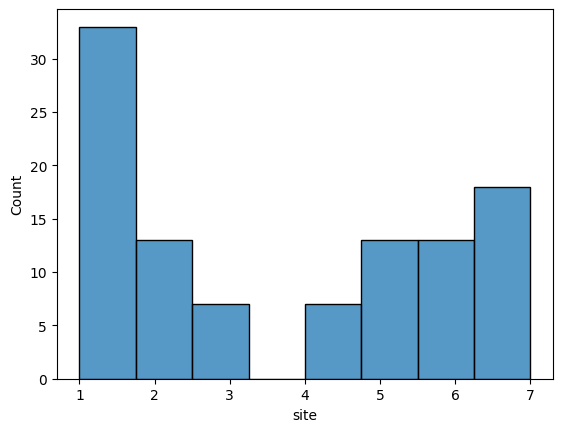

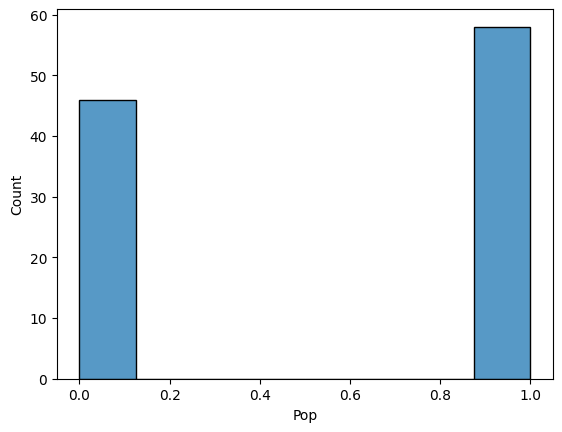

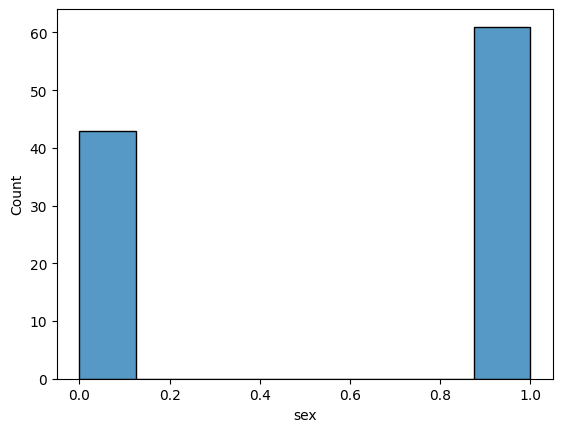

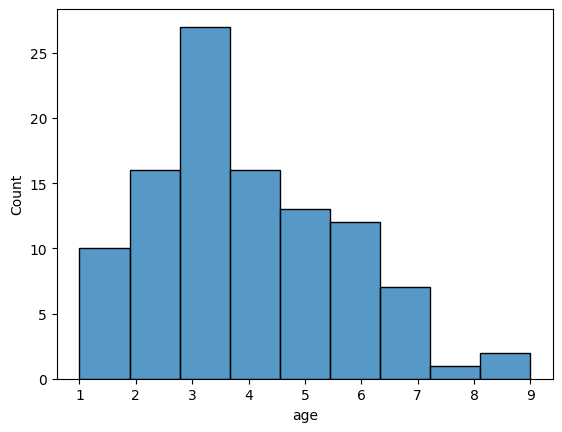

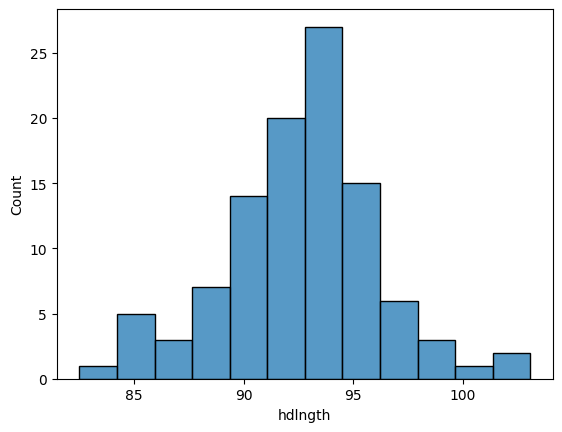

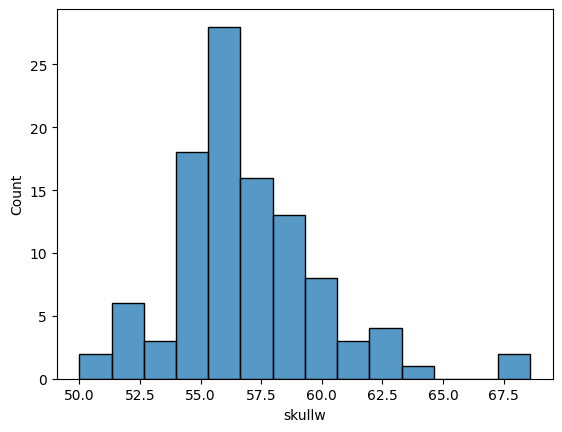

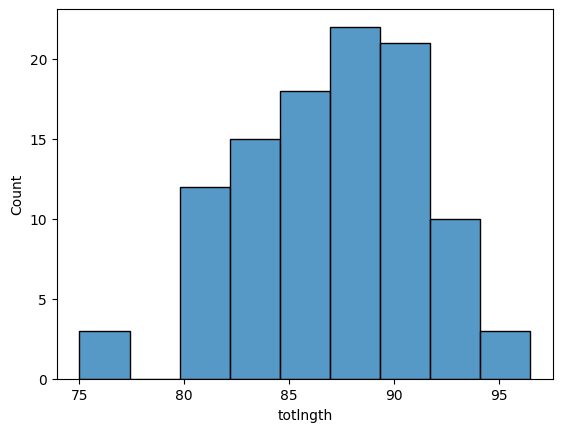

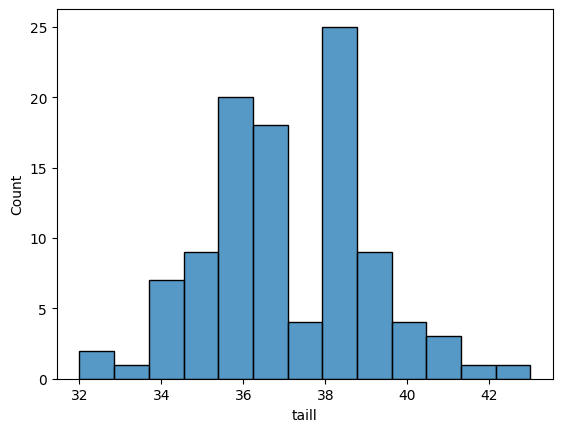

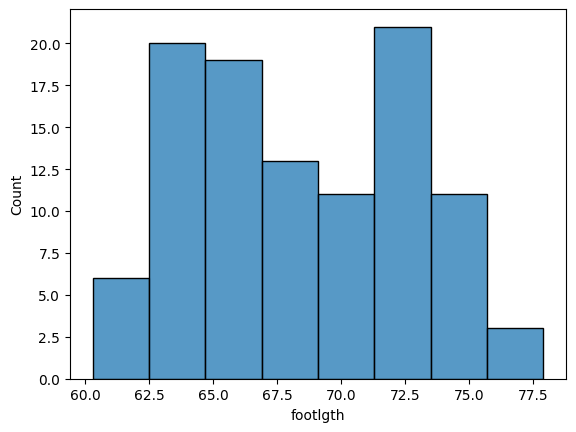

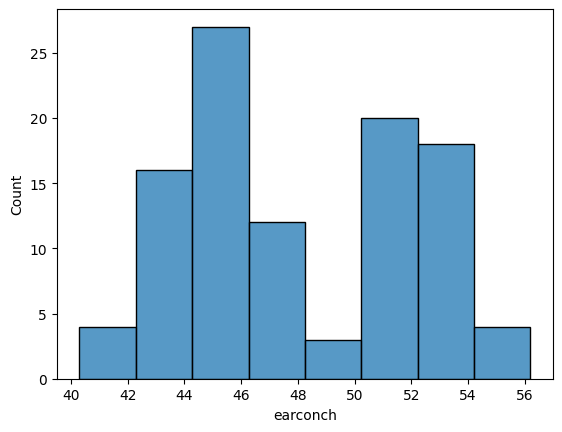

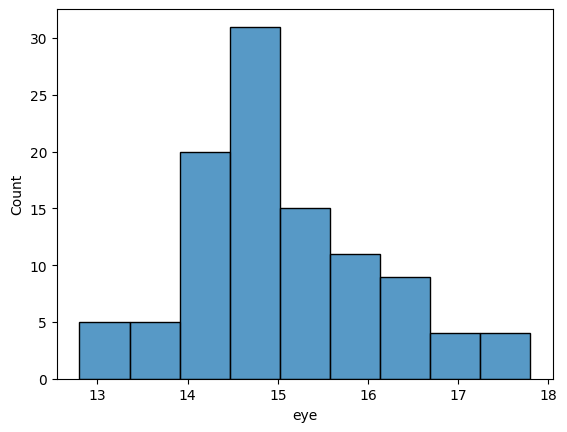

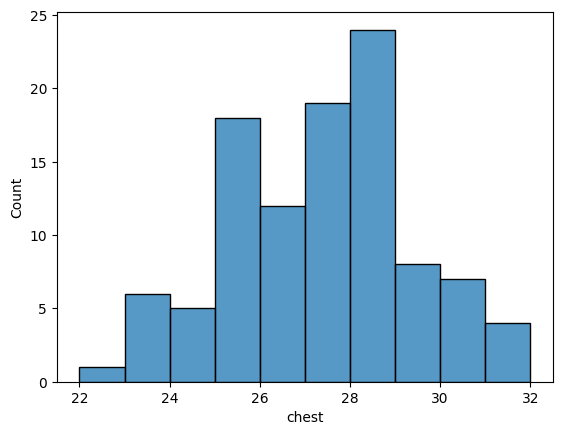

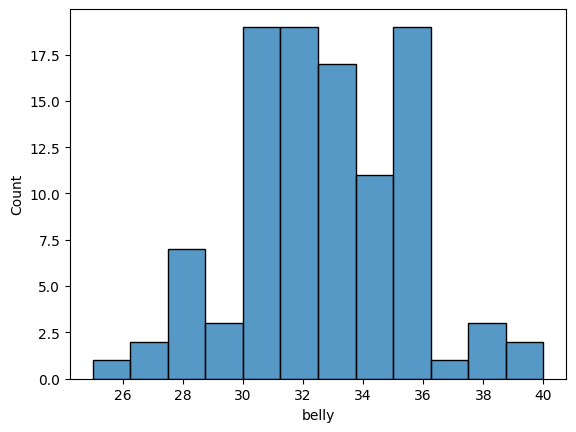

In [13]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.histplot( x =data[i])
        plt.show()

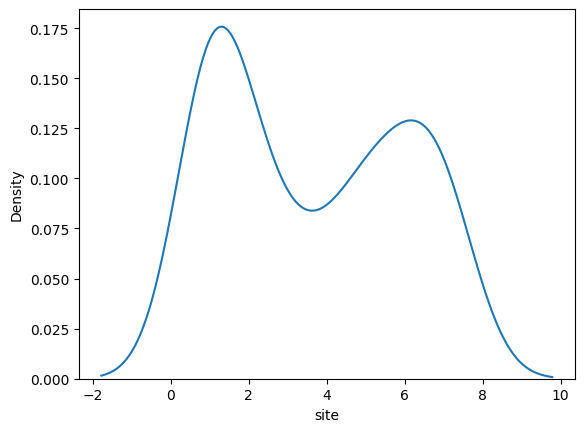

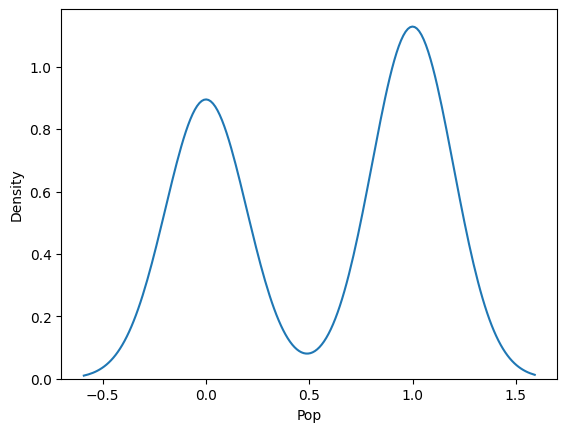

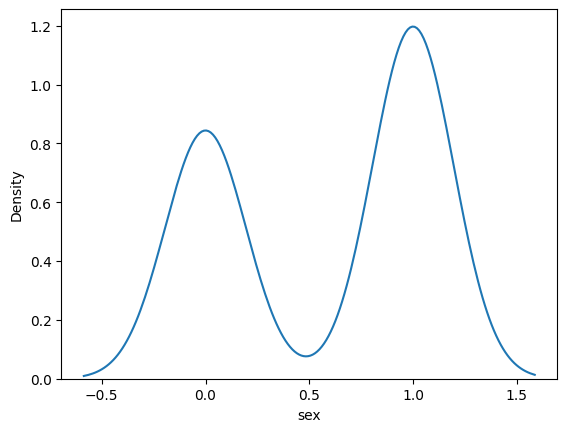

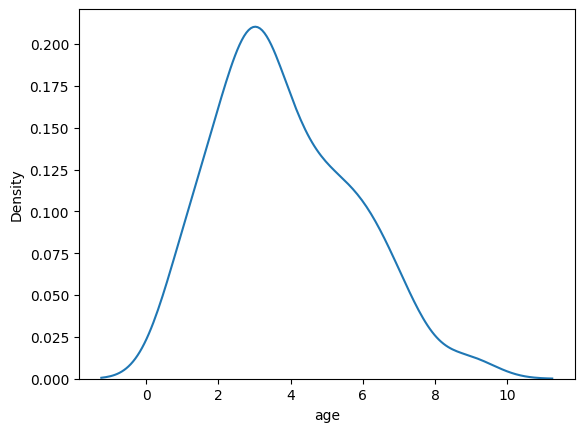

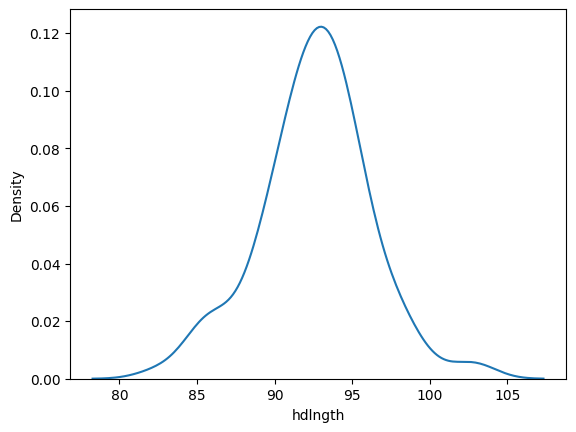

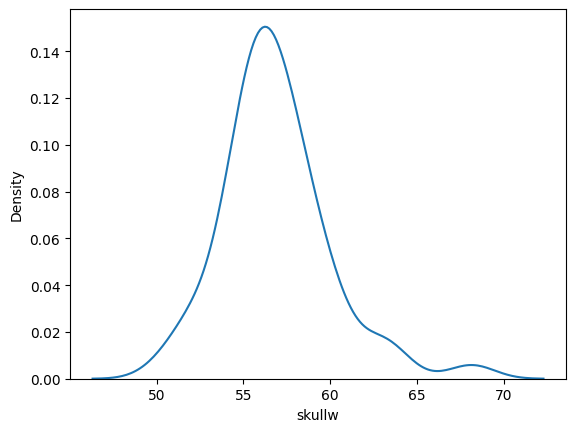

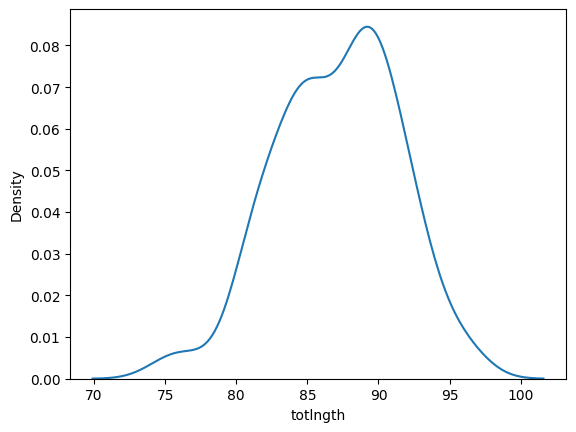

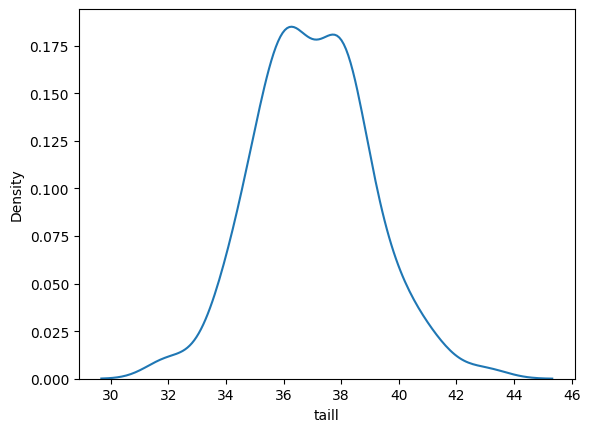

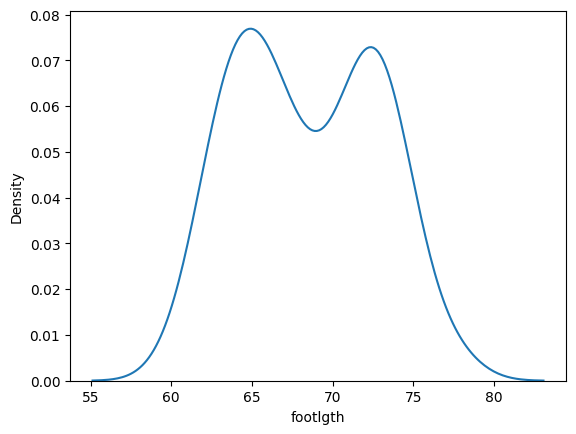

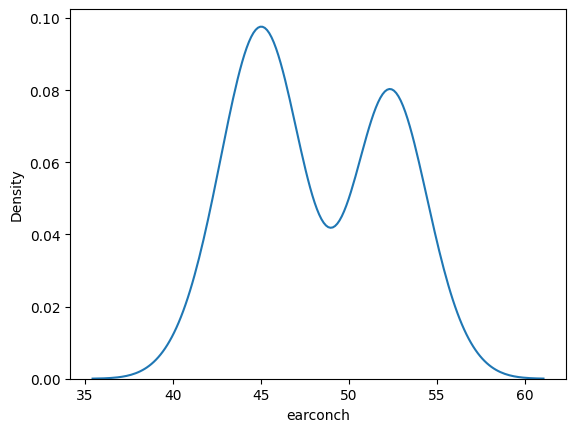

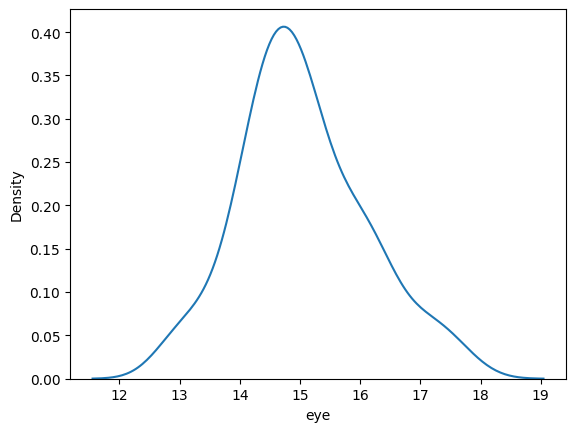

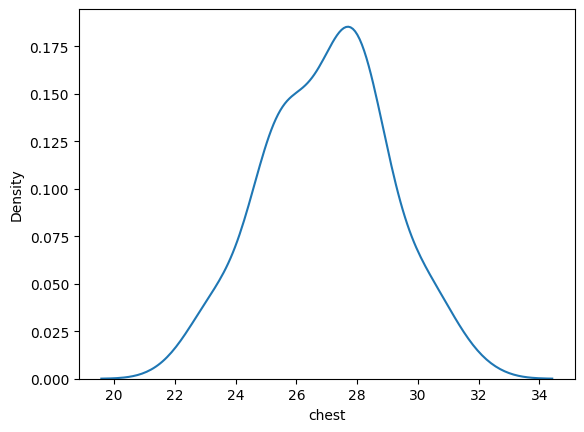

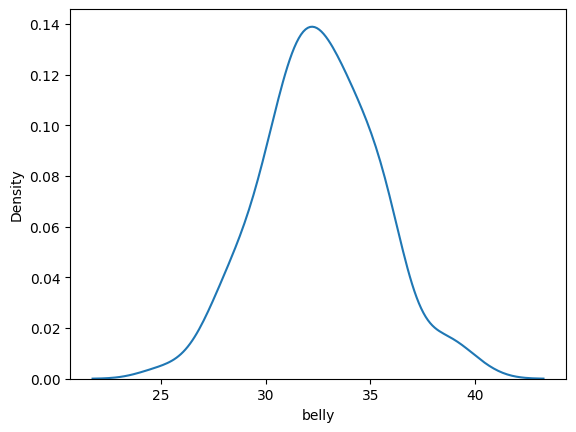

In [14]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.kdeplot( x =data[i])
        plt.show()

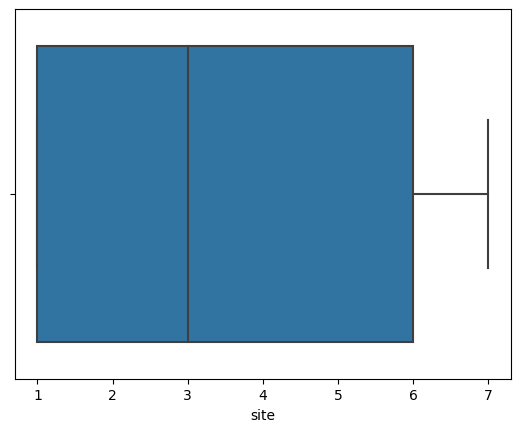

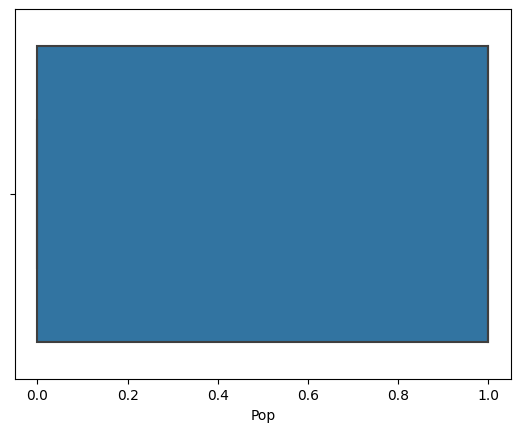

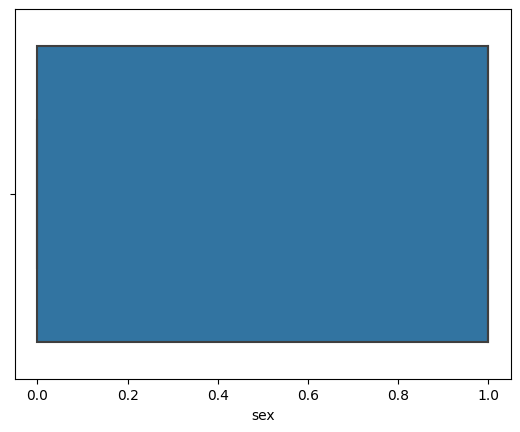

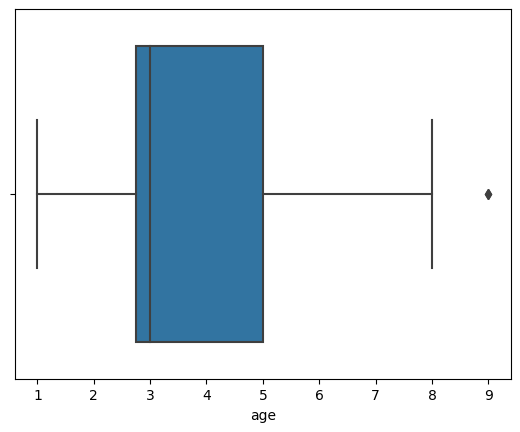

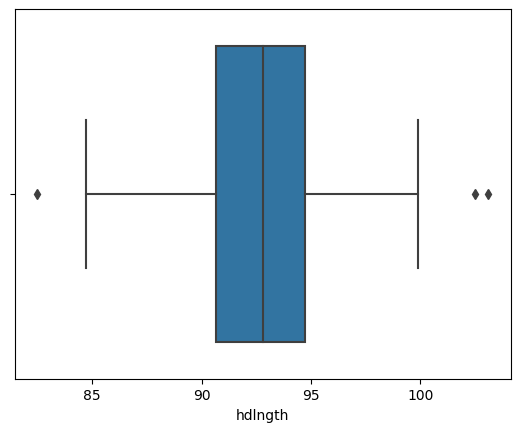

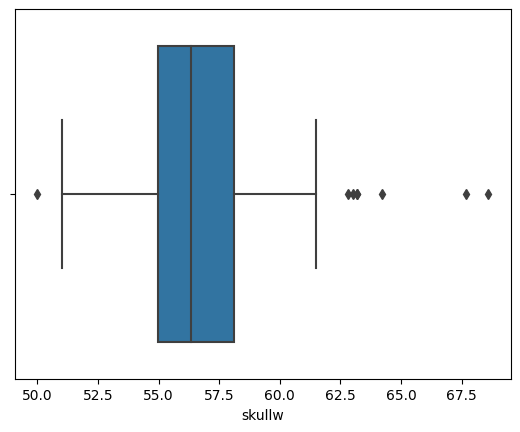

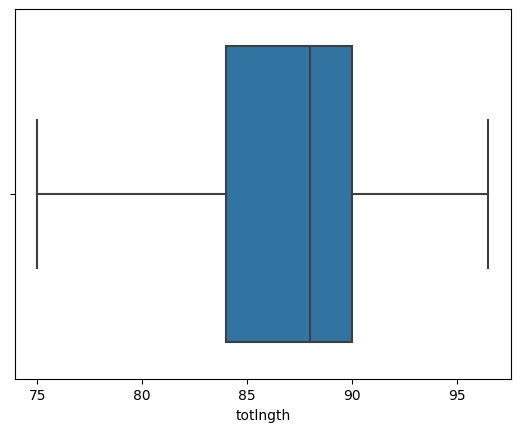

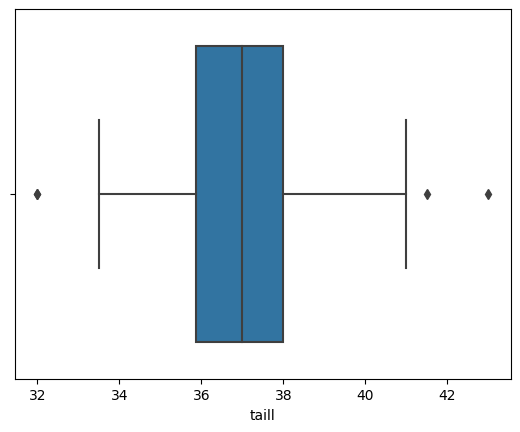

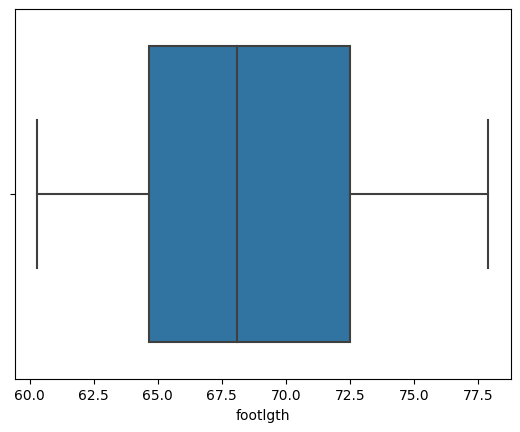

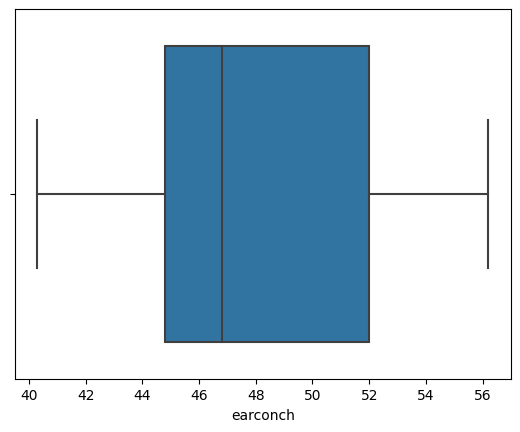

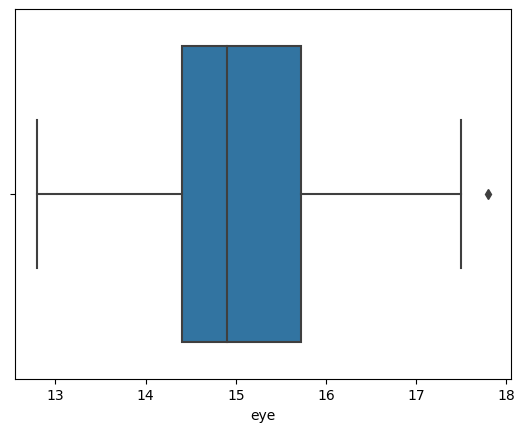

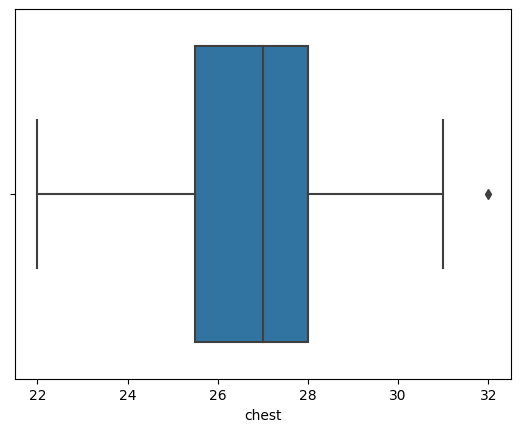

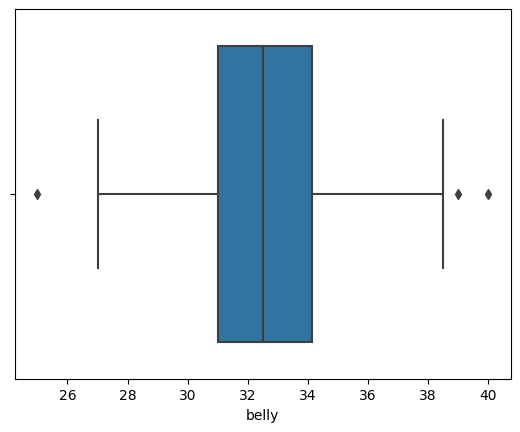

In [15]:
for i in data.columns:
    if data[i].dtype!="object":
        sns.boxplot( x =data[i])
        plt.show()

###  Setting the outlier limits

In [16]:
def outlier_limit(col):
    Q3, Q1 =np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [17]:
for column in data.columns:
    if data[column].dtype !="object":
        UL,LL= outlier_limit(data[column])
        data[column] = np.where((data[column]>UL)|(data[column]<LL), np.nan, data[column])
 

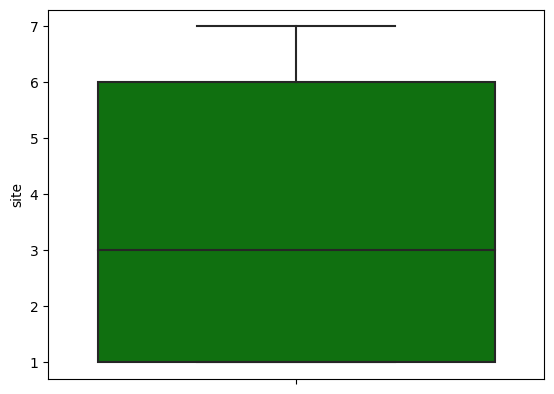

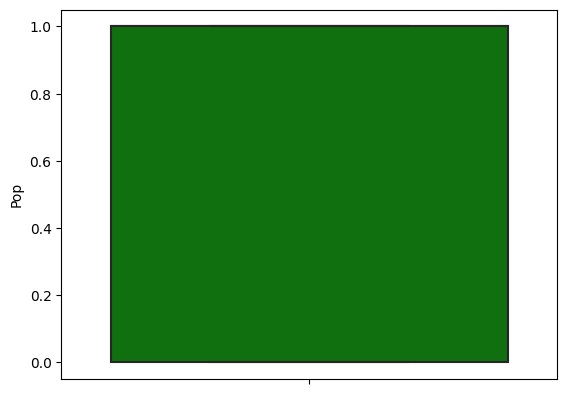

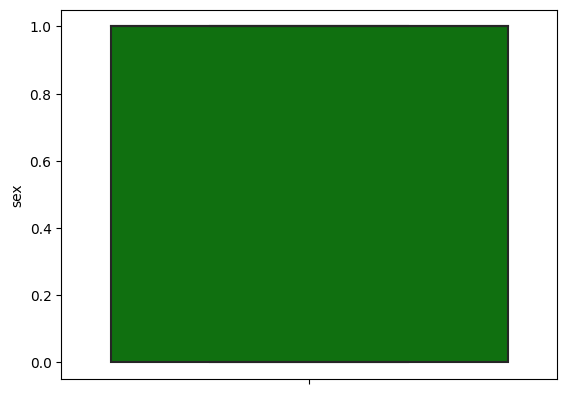

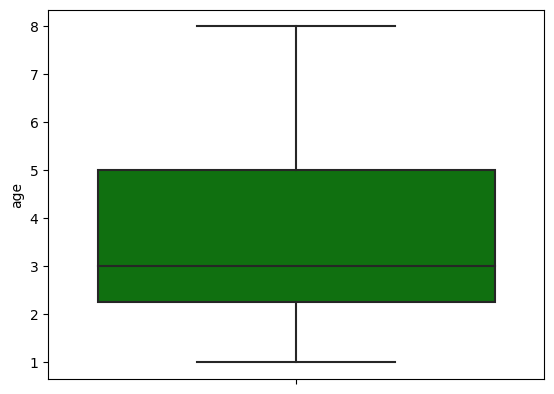

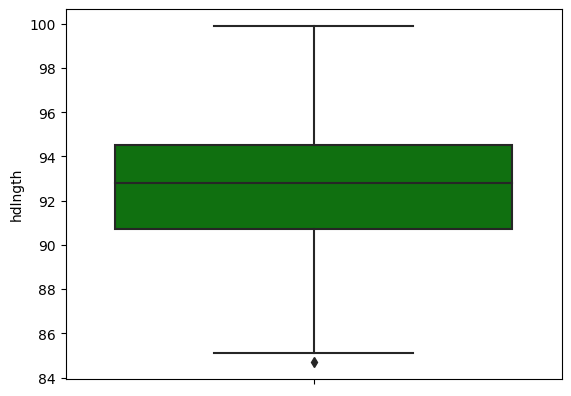

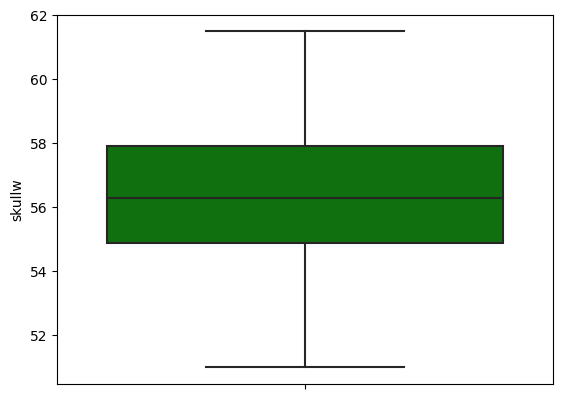

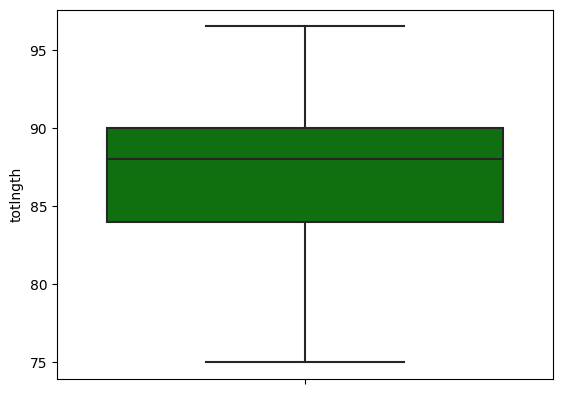

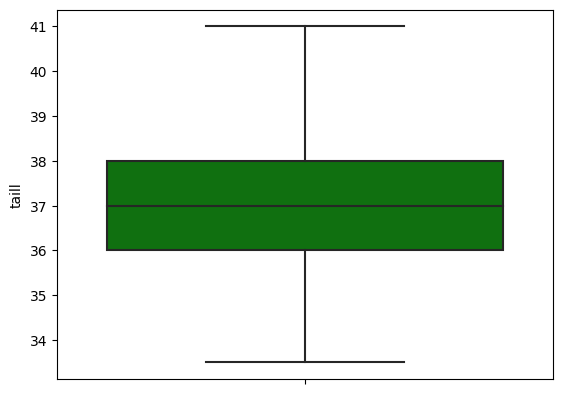

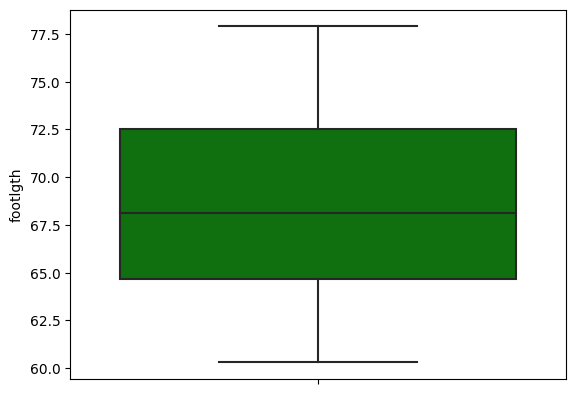

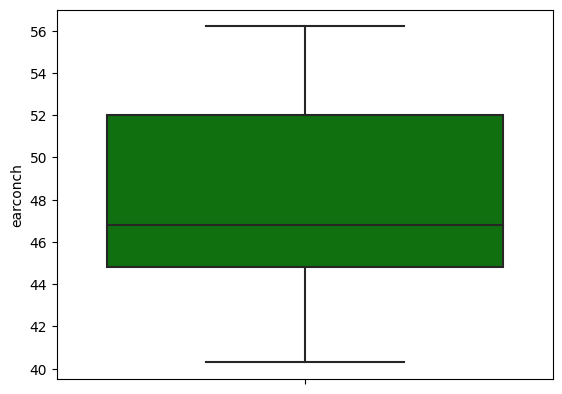

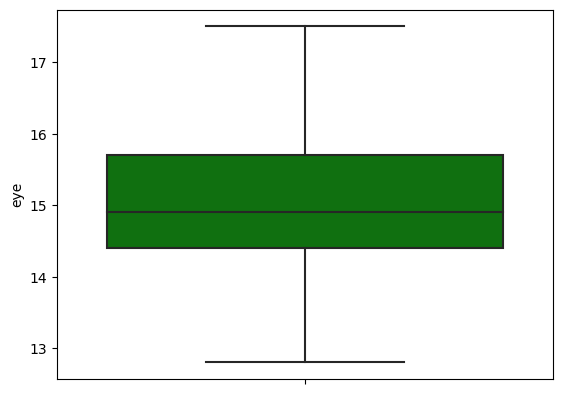

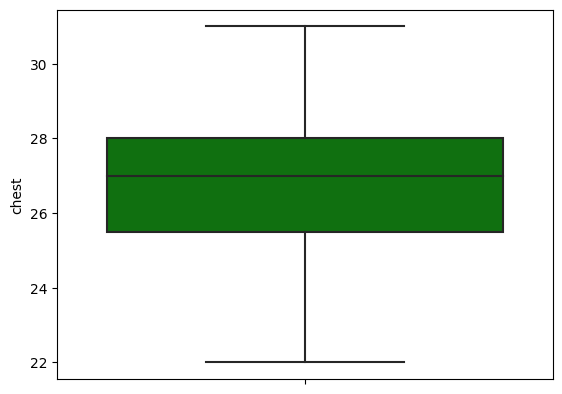

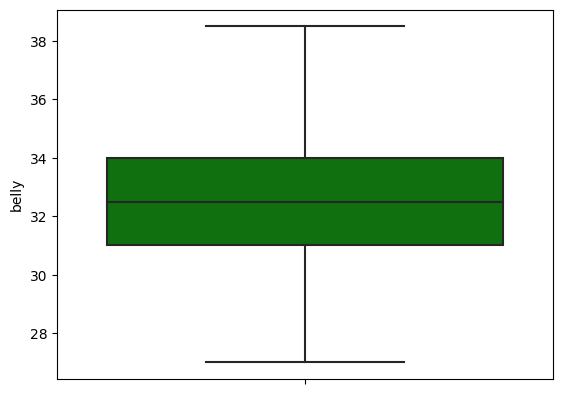

In [18]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.boxplot(y=data[i], color="green")
    plt.show();

In [19]:
data.shape

(104, 13)

### Checking the correlation with the target 'footlgth'

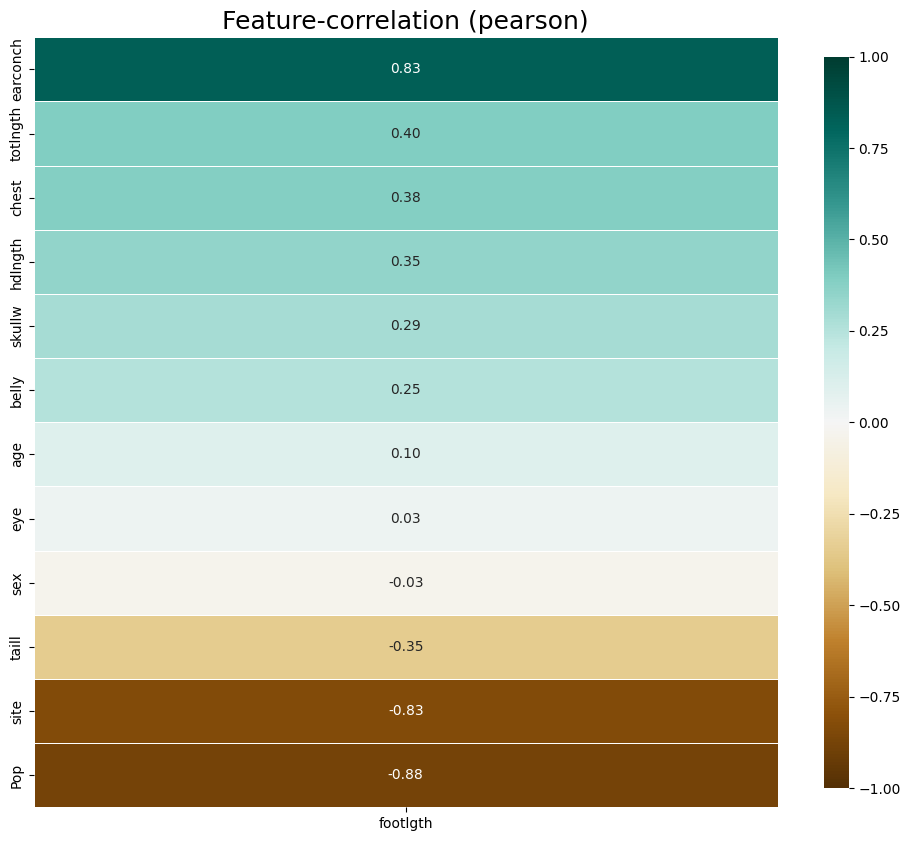

In [38]:
import klib as k
k.corr_plot(data=data, target='footlgth',vmin=-1, vmax=1, annot=True);

### Correlation Using seaborn

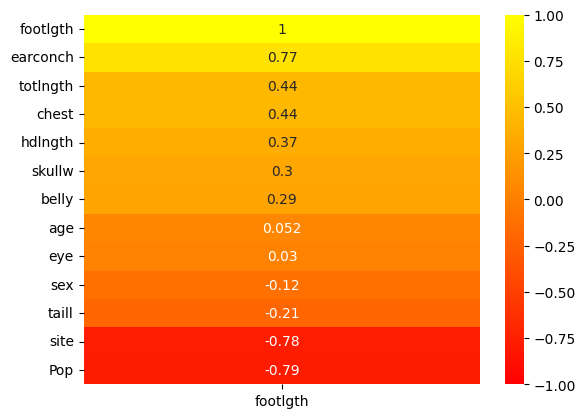

In [20]:
sns.heatmap(data.corr()[["footlgth"]].sort_values(by="footlgth",ascending=False), vmin=-1, vmax=1, annot=True, cmap="autumn");

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    float64
 1   Pop       104 non-null    float64
 2   sex       104 non-null    float64
 3   age       102 non-null    float64
 4   hdlngth   101 non-null    float64
 5   skullw    96 non-null     float64
 6   totlngth  104 non-null    float64
 7   taill     100 non-null    float64
 8   footlgth  104 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       103 non-null    float64
 11  chest     103 non-null    float64
 12  belly     101 non-null    float64
dtypes: float64(13)
memory usage: 10.7 KB


In [22]:
data.dropna(inplace=True)

In [23]:
x=data[['hdlngth','skullw','totlngth','earconch','chest','belly']].values
x


array([[94.1, 60.4, 89. , 54.5, 28. , 36. ],
       [92.5, 57.6, 91.5, 51.2, 28.5, 33. ],
       [94. , 60. , 95.5, 51.9, 30. , 34. ],
       [93.2, 57.1, 92. , 52.2, 28. , 34. ],
       [91.5, 56.3, 85.5, 53.2, 28.5, 33. ],
       [93.1, 54.8, 90.5, 53.6, 30. , 32. ],
       [95.3, 58.2, 89.5, 52. , 30. , 34.5],
       [94.8, 57.6, 91. , 53.9, 29. , 34. ],
       [91.8, 58. , 89.5, 53.4, 27.5, 32. ],
       [94.9, 55.6, 92. , 51. , 28. , 33. ],
       [95.1, 59.9, 89.5, 49.8, 27. , 32. ],
       [95.4, 57.6, 91.5, 53.7, 28. , 31.5],
       [92.9, 57.6, 85.5, 51.8, 28. , 35. ],
       [91.6, 56. , 86. , 51.4, 28. , 32. ],
       [93.5, 55.7, 90. , 55.4, 28. , 32. ],
       [94.4, 55.4, 90.5, 53.9, 28. , 32. ],
       [94.8, 56.3, 89. , 52.4, 27. , 36. ],
       [96.3, 58.5, 91. , 52.1, 28. , 36. ],
       [92.5, 56.1, 89. , 53.3, 28. , 35. ],
       [94.4, 54.9, 84. , 53.5, 27. , 32. ],
       [95.8, 58.5, 91.5, 51.6, 31. , 35. ],
       [96. , 59. , 90. , 56.2, 29. , 38. ],
       [90

In [24]:
y=data[['footlgth']].values
y

array([[74.5      ],
       [72.5      ],
       [75.4      ],
       [76.1      ],
       [71.       ],
       [73.2      ],
       [71.5      ],
       [72.7      ],
       [70.9      ],
       [71.7      ],
       [71.       ],
       [74.3      ],
       [69.7      ],
       [73.       ],
       [73.7      ],
       [73.4      ],
       [73.8      ],
       [73.5      ],
       [72.8      ],
       [75.       ],
       [72.3      ],
       [73.6      ],
       [70.3      ],
       [73.2      ],
       [74.9      ],
       [70.6      ],
       [68.       ],
       [74.8      ],
       [70.8      ],
       [73.1      ],
       [71.2      ],
       [74.3      ],
       [71.2      ],
       [68.4      ],
       [72.8      ],
       [68.4592233],
       [70.3      ],
       [71.5      ],
       [72.8      ],
       [66.       ],
       [69.       ],
       [65.       ],
       [64.       ],
       [67.9      ],
       [67.4      ],
       [68.7      ],
       [63.1      ],
       [63.1 

### Feature Scaling

In [25]:
sc= StandardScaler()

In [26]:
x=sc.fit_transform(x)

### splitting the data into training and testing set

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

### Model building

In [28]:
models={
    "linearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "HistgradientBoostingRegressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}
    

In [45]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train, y_train)*100
    testing_score=model.score(x_test, y_test)*100
    score= r2_score(y_test, model.predict(x_test))*100
    mae=mean_absolute_error(y_test, model.predict(x_test))
    mse=mean_squared_error(y_test, model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained with linearRegression
r2score: 66.22854497178841
training_score: 76.9716402229538
testing_score: 66.22854497178841
mae: 1.64838874196541
mse: 4.459134974797551
rmse_test: 2.111666397610558
****************************************************************************************************
model trained with Ridge
r2score: 66.71949115780802
training_score: 76.95211903875068
testing_score: 66.71949115780802
mae: 1.625099885540729
mse: 4.394311137417883
rmse_test: 2.096261228334361
****************************************************************************************************
model trained with LinearSVR
r2score: -328.3628310990582
training_score: -134.30395409010725
testing_score: -328.3628310990582
mae: 6.830042979607476
mse: 56.5604200488681
rmse_test: 7.520666197144246
****************************************************************************************************
model trained with Lasso
r2score: 59.87567605241531
training_score: 66.39139008069715
testing_score

### Model Building

In [39]:
model=Lasso()

### Model Fiiting

In [40]:
model.fit(x_train, y_train)

Lasso()

In [41]:
training_score=model.score(x_train, y_train)*100
testing_score=model.score(x_test, y_test)*100
score= r2_score(y_test, model.predict(x_test))*100
mae=mean_absolute_error(y_test, model.predict(x_test))
mse=mean_squared_error(y_test, model.predict(x_test))
rmse=np.sqrt(mse)

In [42]:
training_score

66.39139008069715

In [43]:
testing_score

59.87567605241531

In [46]:
score

61.776806989433055

In [47]:
mae

1.7977098166127279

In [48]:
mse

5.046936137619011

In [49]:
rmse

2.2465387015626974

In [50]:
y_pred= model.predict(x)
y_pred

array([74.18      , 72.244     , 73.906     , 75.377     , 71.633     ,
       73.257     , 72.289     , 73.554     , 72.321     , 72.408     ,
       71.57      , 73.949     , 71.134     , 71.555     , 73.719     ,
       73.655     , 73.556     , 73.524     , 72.652     , 74.289     ,
       72.541     , 73.536     , 70.482     , 73.259     , 71.296     ,
       70.821     , 72.716     , 74.458     , 71.13      , 72.427     ,
       74.109     , 73.642     , 71.378     , 71.217     , 72.191     ,
       66.82990291, 70.891     , 71.939     , 72.11      , 65.407     ,
       66.848     , 65.241     , 64.882     , 65.218     , 66.596     ,
       65.461     , 64.08      , 64.081     , 65.9975534 , 64.066     ,
       63.968     , 67.041     , 63.986     , 64.71236893, 65.253     ,
       65.119     , 64.51      , 65.61459223, 61.733     , 62.11      ,
       65.77      , 63.864     , 62.238     , 62.18      , 65.82214563,
       61.72818447, 62.489     , 64.1117767 , 65.62      , 61.21

In [52]:
OUTPUT=pd.DataFrame(zip(y,y_pred), columns=("ACTUAL","PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,74.5,74.180000
1,72.5,72.244000
2,75.4,73.906000
3,76.1,75.377000
4,71.0,71.633000
...,...,...
81,66.0,65.411592
82,64.4,64.919184
83,63.5,63.948000
84,62.9,63.478000


### VISUALISING THE OUTPUT

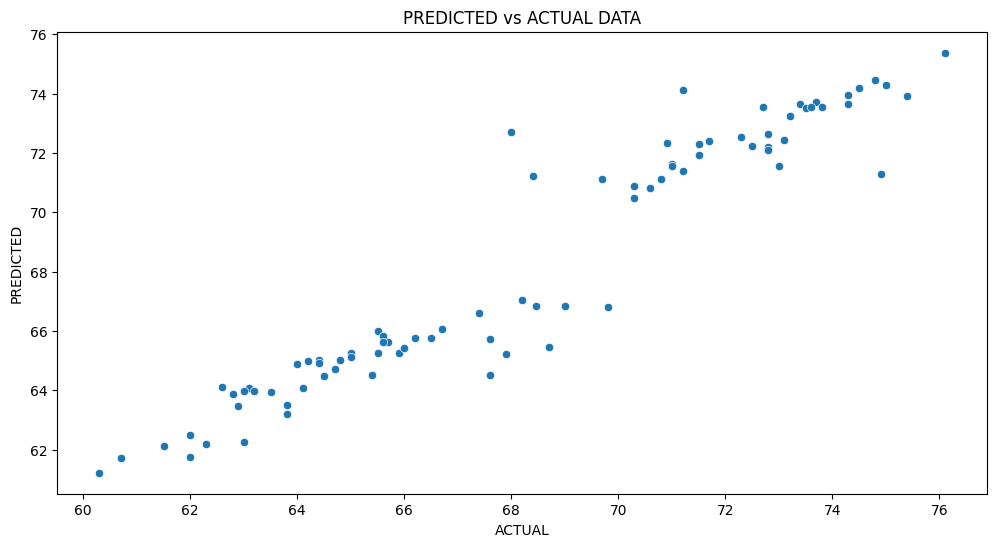

In [54]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED vs ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED");